# Домашнее задание 2. Классификация изображений.

## Введение

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

**✨ Внимание ✨**

https://lightning.ai/docs/pytorch/stable/

## Задание -1 Импорт и подгрузка

In [ ]:
# !pip install wandb
!pip install pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 47.2 MB/s eta 0:00:00


In [ ]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm

In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from IPython.display import clear_output
from torch import nn, optim
from torchvision import transforms
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
from collections import defaultdict, namedtuple

import pytorch_lightning as pl
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from torchmetrics.functional import accuracy

In [ ]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [ ]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2023-12-10 12:40:11--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2023-12-10 12:40:12--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc650957457f643edf8990d155fa.dl.dropboxusercontent.com/cd/0/get/CJJfNoSsACfvDAZx-qVdfKMg9RESWESVpKyFTGd2Syy7Pau1oWD_PY2_rwo7eaXszOA4dN156Q08SCONDxGSJXXgWSM9EEp9XBKF3g1Sb_A_t2PG2Bf_UUojVr8h0a0o8d_MXdFFXxhd_2GFo2YUm8Po/file?dl=1# [following]
--2023-12-10 12:40:12--  https://uc650957457f643edf8990d155fa.dl.dropboxusercontent.com/cd/0/get/CJJfNoSsACfvDAZx-qVdfKMg9RESWESVpKyFTGd2Syy7Pau1oWD_PY2_rwo7eaXszOA4dN156Q08SCONDxGSJXXgWSM9EEp9XBKF

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [ ]:
transform_train = torchvision.transforms.Compose(
    [

        torchvision.transforms.ColorJitter(hue=0.05, saturation=0.05),
        torchvision.transforms.RandomHorizontalFlip(),
        transforms.RandomHorizontalFlip(0.5),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.25, 0.25, 0.25))
    ]
)

transform_val = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]
)


train_dataset = ImageFolder('/content/dataset/dataset/train', transform=transform_train)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=transform_val)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False)

train_dataset[0][0]

tensor([[[-0.1333, -0.1176, -0.1020,  ..., -0.9020, -0.9961, -1.0745],
         [-0.1176, -0.1176, -0.1020,  ..., -0.9490, -1.0275, -1.1059],
         [-0.1020, -0.1020, -0.0863,  ..., -1.0118, -1.0745, -1.1529],
         ...,
         [ 0.4941,  0.7294,  0.3529,  ...,  0.0549,  0.0549,  0.0392],
         [ 0.5255,  0.9490,  1.3098,  ...,  0.0392,  0.1020,  0.1176],
         [ 1.1843,  0.7294,  1.4510,  ..., -0.0078,  0.1176,  0.1647]],

        [[-0.3059, -0.2902, -0.2745,  ..., -0.6824, -0.7765, -0.8549],
         [-0.2902, -0.2902, -0.2745,  ..., -0.7294, -0.8078, -0.8863],
         [-0.2745, -0.2745, -0.2588,  ..., -0.7922, -0.8549, -0.9333],
         ...,
         [-1.6392, -1.3725, -1.6863,  ...,  0.0078, -0.0392, -0.0549],
         [-1.9059, -1.3569, -0.8549,  ..., -0.0078,  0.0392,  0.0549],
         [-1.3412, -1.7176, -0.7608,  ..., -0.0392,  0.0549,  0.1020]],

        [[-0.5255, -0.5098, -0.4941,  ..., -1.2941, -1.3882, -1.4667],
         [-0.5098, -0.5098, -0.4941,  ..., -1

In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple) # зачем-то лежит в кортеже
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

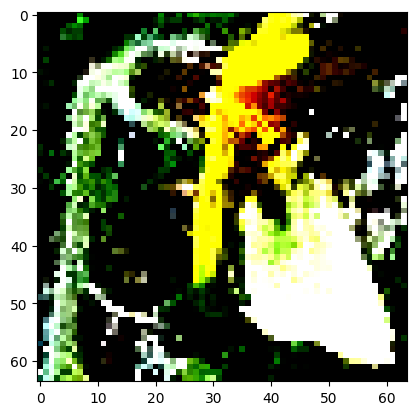

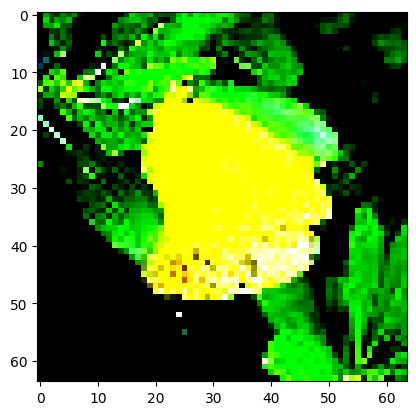

In [ ]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0)) # сначала размеры, потом количество каналов
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1: бейзлайн с семинара



5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

In [ ]:
from torchvision.models import resnet50
from pytorch_lightning import Trainer
model = resnet50(pretrained = False)

In [ ]:
# class WalLeNet(torch.nn.Module):

#     def __init__(self):
#         super().__init__()
#         self.model = resnet50(pretrained=False)
#         # self.fc = nn.Identity()
#         self.model.fc = nn.Linear(self.model.fc.in_features, 200)
#         # self.optimizer = torch.optim.Adam(self.classificator.parameters())
#         self.optimizer = torch.optim.Adam(self.model.parameters())
#         self.loss_func = torch.nn.CrossEntropyLoss()
#         self.targets = torch.Tensor()
#         self.preds = torch.Tensor()

#     def _forward(self, x):
#         return self.model(x)

#     def forward(self, images, target=None):
#         output = self._forward(images)
#         if target is not None:
#             loss = self.loss_func(output, target)

#             self.targets = torch.cat((self.targets, target.cpu()), 0)
#             pred = torch.argmax(output, dim=-1)
#             self.preds = torch.cat((self.preds, pred.cpu()), 0)
#             self.accuracy = accuracy(self.preds.long(), self.targets.long(), task="multiclass", num_classes=200)
#         return loss if target is not None else output

#     def get_accuracy(self, reset=False):
#         # return accuracy by all values till now
#         if reset:
#             self.targets = torch.Tensor()
#             self.preds = torch.Tensor()
#         return self.accuracy

In [ ]:
class WalLeModule(pl.LightningModule):
    def __init__(self) -> None:
        super().__init__()
        self.model = resnet50(pretrained=False)
        self.model.fc = nn.Linear(self.model.fc.in_features, 200)
        self.optimizer = torch.optim.Adam(self.model.parameters())
        self.loss = nn.CrossEntropyLoss()

    def forward(self, x) -> torch.Tensor:
        return self.model(x)

    def configure_optimizers(self):
        return self.optimizer

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long(), task='multiclass', num_classes=200)
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)

In [ ]:
trainer = pl.Trainer(accelerator="gpu", max_epochs=10)
module = WalLeModule()
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 23.9 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
23.9 M    Trainable params
0         Non-trainable params
23.9 M    Total params
95.671    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

In [ ]:
def evaluate_task(model, test_dataloader, device="cuda"):
    model = model.to(device)
    model.eval()
    accurac = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            preds = model.forward(images)
            acc = accuracy(torch.argmax(preds, dim=-1).long(), labels.long(), task='multiclass', num_classes=200)
            accurac += acc
    accurac = accurac / len(test_dataloader)
    return accurac

In [ ]:
accura = evaluate_task(module, val_dataloader)
print(f"Accuracy = {accura:.3f}")

  0%|          | 0/157 [00:00<?, ?it/s]

In [ ]:
print(f"Оценка за это задание составит {(10 * accura / 0.44):.2f} баллов")

## Задание 2



5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

In [ ]:
 torch.save(model.state_dict, '1 task')

In [ ]:
assert False

### Супермодель




In [ ]:
model1 = resnet50(pretrained = True)

In [ ]:
class CoolWalLeNet(pl.LightningModule):
    def __init__(self, pretrained: bool = False) -> None:
        super().__init__()


        self.model = model1
        self.model.fc = nn.Identity()
        self.model.requires_grad_(False)
        self.classifier = nn.Linear(2048, 200)
        self.optimizer = torch.optim.Adam(self.classifier.parameters())
        self.loss = nn.CrossEntropyLoss()

    def forward(self, x) -> torch.Tensor:
        with torch.no_grad():
            features = self.model(x)
        preds = self.classifier(features)
        return preds

    def configure_optimizers(self):
        return self.optimizer

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long(), task = 'MULTICLASS', num_classes = 200)
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)



In [ ]:
device =  "cuda"

module = CoolWalLeNet()

In [ ]:
trainer = pl.Trainer(accelerator="cuda", max_epochs=10)   # logger=wandb_logger
trainer.fit(module, train_dataloader, val_dataloader)

### Валидация результатов задания

In [ ]:
model = model1# Подгрузить свою сохраненную модель сюда

accura = evaluate_task(model1, val_dataloader)

In [ ]:

print(f"Оценка за это задание составит {(10 * (accura - 0.5) / 0.34):.2f} баллов") # F

## Отчёт об экспериментах



текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

In [ ]:
assert False

In [ ]:
# Ошибка GPU - переключился на CPU

# Ошибка размерности при переходе от сверток к линейному слою -(64x3136 and 4096x0), заменил на (in_features = 3136, out_features= 1024)

# Ошибка с количеством классов для accuracy - везде поменял количество классов с 10 до 200

# Ошибка в evaluation: сначала нужно создать loss = CrossEntropy(), и только потом считать loss(a, b)

# Ошибка с accuracy: под этим именем были и функция, и массив, из-за чего форвард не работал

In [ ]:
# Бейзлайн - 0.1273

# Модель:

class SimpleNet(torch.nn.Module):
    def __init__(self, dropout=0.4):

        super().__init__()

        self.batch_norm1 = torch.nn.BatchNorm2d(3)
        self.relu = torch.nn.ReLU()
        self.maxpool = torch.nn.MaxPool2d(kernel_size=2)
        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3),
            self.relu,
            self.maxpool
        )
        self.batch_norm2 = torch.nn.BatchNorm2d(32)
        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=32, out_channels=16, kernel_size=3),
            self.relu,
            self.maxpool
        )

        self.linear1 = torch.nn.Linear(in_features = 3136, out_features= 1024)
        self.linear2 = torch.nn.Linear(in_features=1024, out_features=512)
        self.output = torch.nn.Linear(in_features=512, out_features=200)
        self.dropout = torch.nn.Dropout(p=dropout)

        # --------------

        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()

    def _forward(self, x):

        x = self.batch_norm1(x)
        x = self.conv1(x)

        x = self.batch_norm2(x)
        x = self.conv2(x)

        x = x.view(x.size(0), -1)
        x = self.relu(self.linear1(x))
        x = self.dropout(x)
        x = self.relu(self.linear2(x))

        return self.output(x)
        # --------------

    def forward(self, images, target=None):
        # images ~ (batch size, num channels, height, width)
        # target ~ (batch size)
        # output ~ (batch size, num classes)
        output = self._forward(images)

        # get accuracy score and save it to self.accuracy
        if target is not None:
            loss = self.loss_func(output, target)

            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)
            self.accuracy = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=200)

        return loss if target is not None else output

    def get_accuracy(self, reset=False):
        # return accuracy by all values till now
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accuracy

In [ ]:
# Добавил аугментации

In [ ]:
# Добавил нормализацию

Буквально сходу выбил хорошее качество резнетом:

In [ ]:
model = resnet50(pretrained = False)

class WalLeModule(pl.LightningModule):
    def __init__(self) -> None:
        super().__init__()
        self.model = resnet50(pretrained=False)
        self.model.fc = nn.Linear(self.model.fc.in_features, 200)
        self.optimizer = torch.optim.Adam(self.model.parameters())
        self.loss = nn.CrossEntropyLoss()

    def forward(self, x) -> torch.Tensor:
        return self.model(x)

    def configure_optimizers(self):
        return self.optimizer

    def training_step(self, train_batch, batch_idx) -> torch.Tensor:
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx) -> None:
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long(), task='multiclass', num_classes=200)
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)

In [ ]:
# я больше страдал не от экспериментов, а от маленьких бесявых ошибок, которые сложно найти,
# легко потерять и невозможно забыть(((

In [ ]:
второе задание я зафакапил(